In [31]:
from PyPDF2 import PdfReader
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim import corpora, models

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Łukasz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Funkcja czytająca pliki w formacie PDF
Funkcja `read_pdf` służy do odczytywania zawartości plików PDF. Przyjmuje jeden argument file_path, który jest ścieżką do pliku PDF.

In [3]:
def read_pdf(file_path):
    with open(file_path, 'rb') as file:
        pdf_reader = PdfReader(file)
        num_pages = len(pdf_reader.pages)

        text = ''
        for page in pdf_reader.pages:
            text += page.extract_text()
        
        return text

In [4]:
book1_path = 'Noise a flaw in human judgement.pdf'
book2_path = 'Thinking fast and slow.pdf'

book1 = read_pdf(book1_path)
book2 = read_pdf(book2_path)

# Funkcja do czyszczenia i tokenizacji tekstu

In [38]:
#Normalizacja tekstu

def cleaned_text(text):
    temp = re.sub("\s{2,}", " ", text) #usunięcie podwójnych spacji
    temp = re.sub("(\r\n|\r|\n)", " ", temp) #usunięcie przerw między słowami, entery
    temp = temp.lower() #zamienia wszystkie znaki na małe litery
    temp = re.sub("rt", "", temp) #usunięcie retweetów
    temp = re.sub("&amp", "", temp) #usunięcie kodu htmlowego
    temp = re.sub("#[a-z,A-Z]*", "", temp) #usunięcie hasztagów
    temp = re.sub("@\w+", "", temp) #usunięcie wzmianek, oznaczeń, tagowań
    temp = re.sub("(f|ht)(tp)([^ ]*)", "", temp) #usunięcie urlów
    temp = re.sub("http(s?)([^ ]*)", "", temp) #usunięcie urlów
    temp = re.sub("[!\"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]", " ", temp) #usunięcie znaków specjalnych
    temp = re.sub("\d", "", temp) #usunięcie cyfr
    temp = re.sub("\s{2,}", " ", temp) #ponowne usunięcie podwójnych spacji
    temp = re.sub("[^\w\s]", "", temp) #usunięcie znaków specjalnych
    temp = temp.strip() #usunięcie spacji lub odstępów na końcach tekstu
    
    # Inicjalizacja stop words
    stop_words = set(stopwords.words('english'))
    alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    my_stopwords = list(stop_words) + [str(letter) for letter in alphabet]
    #tokenizacja tekstu za pomocą biblioteki NLTK
    cleaned_and_tokenized = nltk.word_tokenize(temp)
    
    # Usunięcie stopwordsów
    cleaned_and_tokenized_without_stopwords = [word for word in cleaned_and_tokenized if word.lower() not in my_stopwords]
    
    return cleaned_and_tokenized_without_stopwords

In [11]:
book1_cleaned = cleaned_text(book1)
book2_cleaned = cleaned_text(book2)

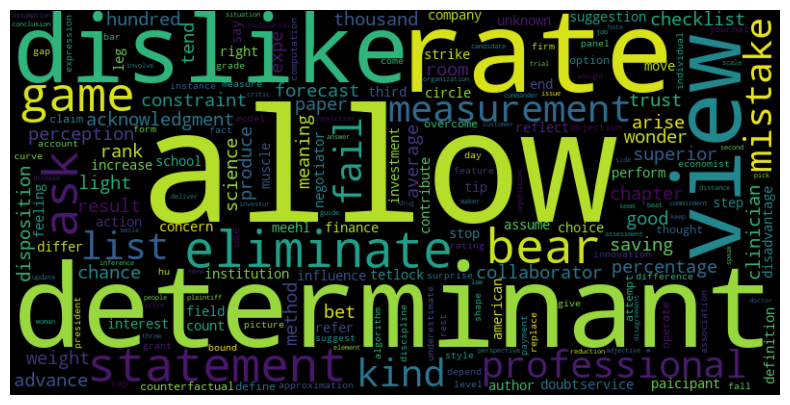

In [15]:
# Połączenie list unikalnych słów z obu dokumentów
common_words = list(set(book1_cleaned).intersection(book2_cleaned))

# Tworzenie chmury słów
wordcloud = WordCloud(width=800, height=400).generate(' '.join(common_words))

# Wyświetlenie chmury słów
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

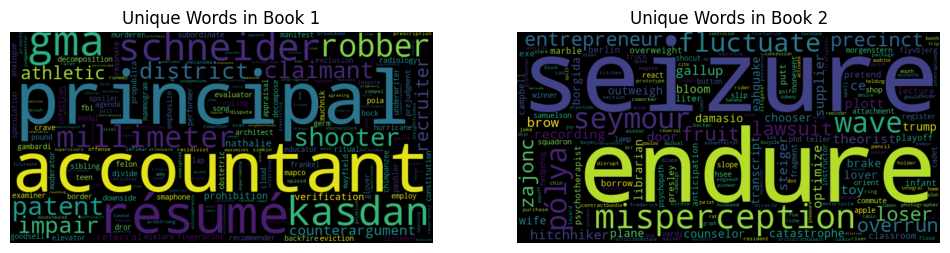

In [16]:
# Unikalne słowa występujące tylko w book1
unique_words_book1 = list(set(book1_cleaned) - set(book2_cleaned))

# Tworzenie chmury słów dla book1
wordcloud_book1 = WordCloud(width=800, height=400).generate(' '.join(unique_words_book1))

# Unikalne słowa występujące tylko w book2
unique_words_book2 = list(set(book2_cleaned) - set(book1_cleaned))

# Tworzenie chmury słów dla book2
wordcloud_book2 = WordCloud(width=800, height=400).generate(' '.join(unique_words_book2))

# Wyświetlenie chmur słów
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(wordcloud_book1, interpolation='bilinear')
axes[0].set_title('Unique Words in Book 1')
axes[0].axis('off')
axes[1].imshow(wordcloud_book2, interpolation='bilinear')
axes[1].set_title('Unique Words in Book 2')
axes[1].axis('off')
plt.show()

# Porównanie książek w podziale na rozdziały

In [44]:
def extract_chapter_from_pdf(book_path, start_page, end_page):
    with open(book_path, 'rb') as file:
        pdf_reader = PdfReader(file)
        text = ''
        for page_number in range(start_page - 1, end_page):
            page = pdf_reader.pages[page_number]
            text += page.extract_text()
        return text

In [11]:
# Wyodrębnienie drugiego rozdziału z book1 (37-91 to strony, na których napisany jest rozdział 2 w PDF w book1)
book1_chapter2 = extract_chapter_from_pdf('Noise a flaw in human judgement.pdf', 37, 91)

# Wyodrębnienie pierwszego rozdziału z book2 (21-105 to strony na których napisany jest rozdział 1 w PDF w book2)
book2_chapter1 = extract_chapter_from_pdf('Thinking fast and slow.pdf', 21, 105)

# Analiza tematyczna rozdziałów w książkach

In [45]:
# Zakresy stron dla wybranych rozdziałów
book_chapter_pages = extract_chapter_from_pdf('Noise a flaw in human judgement.pdf', 37, 91)
#print(book_chapter_pages)

# Odczytanie zawartości stron dla wybranych rozdziałów
book_chapter_texts = []
for chapter_page_range in book_chapter_pages:
    start_page, end_page = chapter_page_range
    #chapter_pages = extract_chapter_from_pdf(book_path, start_page, end_page)
    chapter_text = ' '.join(extract_chapter_from_pdf(start_page, end_page))
    cleaned_chapter_text = cleaned_text(chapter_text)
    book_chapter_texts.append(cleaned_chapter_text)

# Przykładowa analiza tematyczna dla pierwszego rozdziału z book1
num_topics = 5

dictionary = corpora.Dictionary(book_chapter_texts)
corpus = [dictionary.doc2bow(text) for text in book_chapter_texts]
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary)

# Wyświetlenie wyników analizy tematycznej
for i, topic in lda_model.show_topics(num_topics=num_topics, formatted=False):
    print(f"Topic #{i + 1}:")
    for word, prob in topic:
        print(f"{word}: {prob}")
    print()

ValueError: not enough values to unpack (expected 2, got 1)